# Cancer rates modelling
Following is an experiment at modelling cancer rates from Gelman et. al BDA3 (section 2.7).
I was trying to create a model that would be able to handle all cases of poisson regression simultaneously.
However I observed that the higher number of components (which should be independent from each other) problem becomes increasingly worse conditioned. Divergences start to appear with 3 components, and everyth

In [3]:
import sys
sys.path.append('../')
import pystan
import stan_utility

import arviz as az
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as stats

import pandas as pd

In [4]:
plt.style.context('seaborn-white')

In [5]:
counties_dc=pd.read_csv('counties_dc.csv',index_col=0)
dc=np.array(counties_dc.dc).astype('int')
pop=np.array(counties_dc.population).astype('int')

In [6]:
with open('cancer_fit.stan', 'r') as file:
    print(file.read())

data {
  int N; //number of observations
  int y[N]; //observed cases at each observations
  vector[N] pop; //population at each observation
}

parameters {
  vector[N] theta;//estimated death parameters
}
transformed parameters {
  vector[N] lambda=pop .* theta;
}

model {
  theta ~ gamma(20,430000);
  y ~ poisson(lambda);
}



In [7]:
model=stan_utility.compile_model('cancer_fit.stan')

Using cached StanModel


In [15]:
N=4
data = dict(N = N,
            y = dc[0:N],
            pop=pop[0:N])
fit = model.sampling(data=data, seed=26042020)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fded932b190>,
      dtype=object)

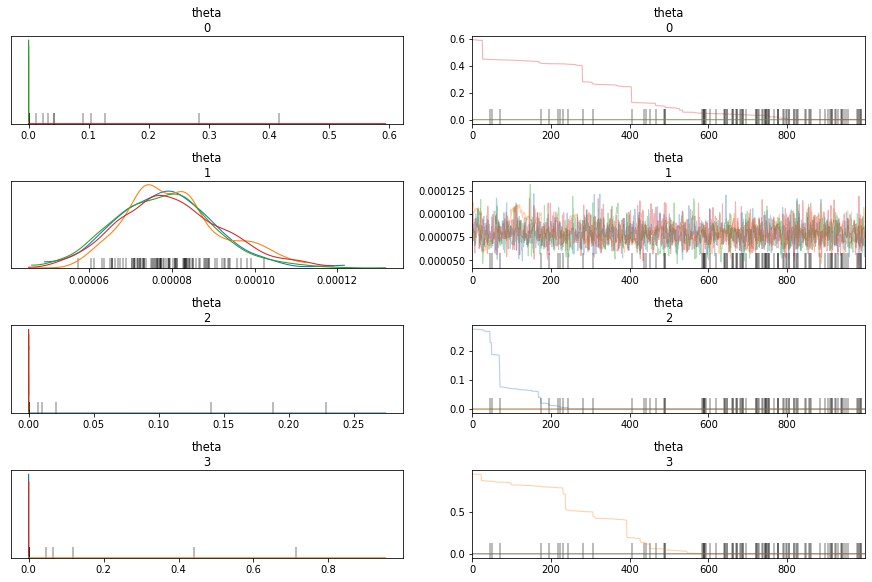

In [16]:
az.plot_trace(fit,var_names='theta')


In [17]:
data = az.from_pystan(
    posterior=fit,
    observed_data=['y'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdee9861190>,
      dtype=object)

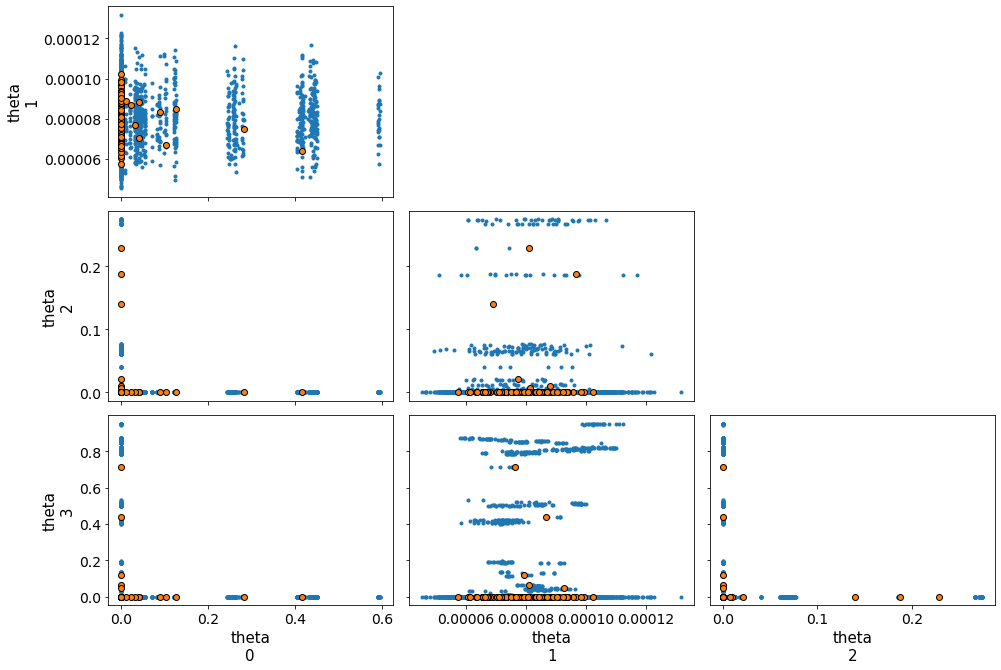

In [18]:
az.plot_pair(data,divergences=True,var_names=['theta'])